# Transformation Function - Example

### Author: Emanuel Baslios

This is a simple transformation function that is commonly used within quantitative economics



For more information on the background and logic visit [emanuel.computer](https://emanuel.computer).


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy.optimize import minimize

In [10]:
def production_function(inputs, params):
    # Cobb-Douglas production function
    L, K = inputs
    A, alpha, beta = params
    return A * L**alpha * K**beta

def cost_function(inputs, prices):
    # Cost function
    wage, rental_rate = prices
    L, K = inputs
    return wage * L + rental_rate * K

def objective_function(inputs, params, prices):
    # Objective function to maximize output subject to cost constraint
    return -production_function(inputs, params)

# Input parameters
A = 1.0  # Total factor productivity
alpha = 0.3  # Output elasticity of labor
beta = 0.7  # Output elasticity of capital

# Input prices
wage = 10.0  # Wage rate for labor
rental_rate = 20.0  # Rental rate for capital

# Define the optimization problem
constraints = ({'type': 'ineq', 'fun': lambda x: cost_function(x, [wage, rental_rate]) - 100.0})  # Cost constraint
result = minimize(objective_function, x0 = [1.0, 1.0], args = ([A, alpha, beta], [wage, rental_rate]), constraints=constraints)

# Print the optimal solution
print("Optimal solution:")
print(f"Labor (L): {result.x[0]}")
print(f"Capital (K): {result.x[1]}")
print(f"Output (Y): {production_function(result.x, [A, alpha, beta])}")
print(f"Cost: {cost_function(result.x, [wage, rental_rate])}")



Optimal solution:
Labor (L): 6.117273250667043e+30
Capital (K): 1.0625535631565978e+31
Output (Y): 9.003532705335283e+30
Cost: 2.7368344513798997e+32


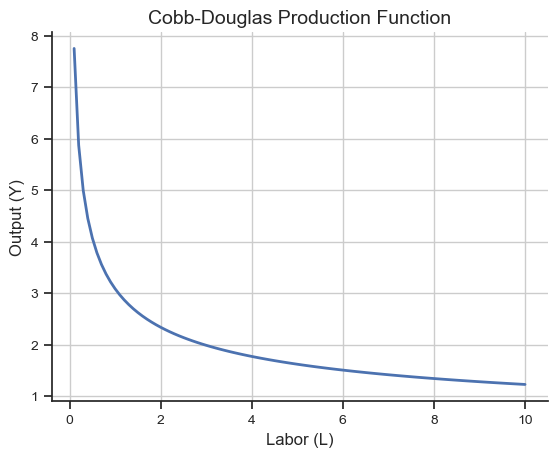

In [11]:
# Range of labor inputs
L_range = np.linspace(0.1, 10.0, 100)

# Calculate output for different labor inputs
output = A * L_range**alpha * (100.0 / (rental_rate * L_range))**beta

# Set seaborn style
sns.set(style='ticks')

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the production function
ax.plot(L_range, output, linewidth=2)
ax.set_xlabel('Labor (L)', fontsize=12)
ax.set_ylabel('Output (Y)', fontsize=12)
ax.set_title('Cobb-Douglas Production Function', fontsize=14)
ax.grid(True)

# Adjust tick parameters
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()